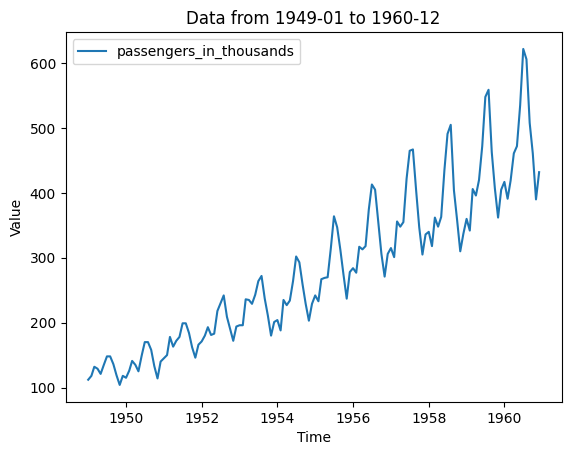

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/airline/airline.csv')

def plot_csv_by_time(csv_path, start_time, end_time):
    # Load CSV file into a pandas dataframe
    df = pd.read_csv(csv_path,parse_dates=['Month'],  index_col=['Month'])
    
    # Select rows within the specified time range
    df = df.loc[start_time:end_time]
    
    # Generate a line plot for each column in the dataframe
    for col in df.columns:
        plt.plot(df.index, df[col], label=col)
    
    # Set plot title and axis labels
    plt.title(f"Data from {start_time} to {end_time}")
    plt.xlabel("Time")
    plt.ylabel("Value")
    
    # Display legend and show plot
    plt.legend()
    plt.show()


plot_csv_by_time('data/airline/airline.csv', '1949-01', '1960-12')

In [23]:
import torch
import pandas as pd
from src.utils import load_checkpoint
from src.scaler import Scaler
from src.dataset import TimeSeriesDataset
from src.forecast_strategy import LSTMStrategy
from src.train import train, inference

input_field = ['passengers_in_thousands']
output_field = ['passengers_in_thousands']
timeseries_field = list(set(input_field + output_field))
datasetPath = 'data/airline/airline.csv'
modelPath = 'out/LSTMForecaster_airline/n1_hs16_t18/best.pth.tar'

n=1
hs=16
t=18

strategy = LSTMStrategy(modelPath, num_layers=n, hidden_size=hs, lookback_length=t)
strategy.load_data(datasetPath)
df = strategy.forecast(input_field, output_field, 12)

=> loaded checkpoint 'True' (epoch 4238)
Checkpoint's train loss is: 0.0540
Checkpoint's validation loss is: 0.0078


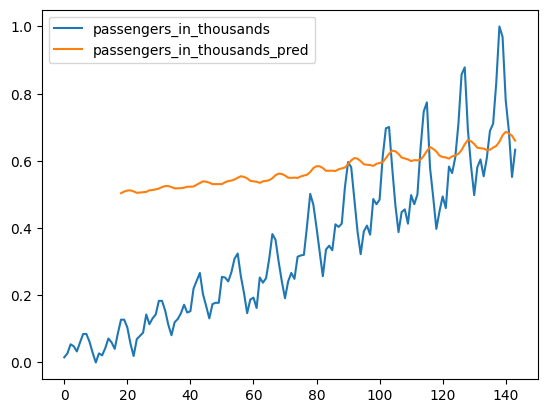

In [24]:
import matplotlib.pyplot as plt

cols = ['passengers_in_thousands', 'passengers_in_thousands_pred']
for col in cols:
    plt.plot(df[col], label=col)
plt.legend()
plt.show()